# Fashion MNIST

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


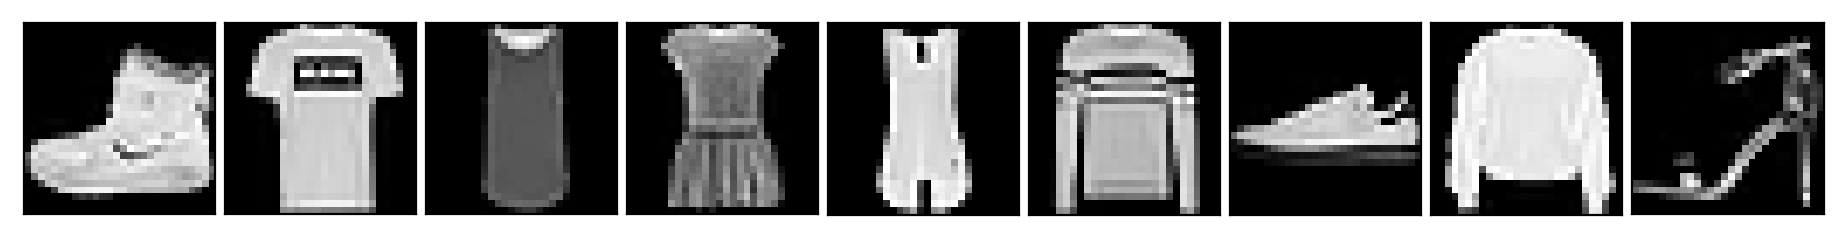

In [4]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

# 実装

In [7]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# 比較用のモデル構築
model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 4s - loss: 0.9160 - acc: 0.6784 - val_loss: 0.5039 - val_acc: 0.8204
Epoch 2/10
 - 3s - loss: 0.4685 - acc: 0.8352 - val_loss: 0.4367 - val_acc: 0.8402
Epoch 3/10
 - 3s - loss: 0.4004 - acc: 0.8566 - val_loss: 0.3998 - val_acc: 0.8526
Epoch 4/10
 - 3s - loss: 0.3666 - acc: 0.8660 - val_loss: 0.4118 - val_acc: 0.8504
Epoch 5/10
 - 3s - loss: 0.3466 - acc: 0.8743 - val_loss: 0.3659 - val_acc: 0.8661
Epoch 6/10
 - 3s - loss: 0.3222 - acc: 0.8825 - val_loss: 0.3643 - val_acc: 0.8690
Epoch 7/10
 - 3s - loss: 0.3003 - acc: 0.8904 - val_loss: 0.3414 - val_acc: 0.8786
Epoch 8/10
 - 3s - loss: 0.2925 - acc: 0.8920 - val_loss: 0.3399 - val_acc: 0.8797
Epoch 9/10
 - 3s - loss: 0.2764 - acc: 0.8988 - val_loss: 0.3382 - val_acc: 0.8792
Epoch 10/10
 - 3s - loss: 0.2631 - acc: 0.9030 - val_loss: 0.3262 - val_acc: 0.8842


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 1.8812 - acc: 0.4411 - val_loss: 1.5369 - val_acc: 0.6164
Epoch 2/10
 - 1s - loss: 1.3243 - acc: 0.6434 - val_loss: 1.1650 - val_acc: 0.6569
Epoch 3/10
 - 1s - loss: 1.0588 - acc: 0.6753 - val_loss: 0.9860 - val_acc: 0.6784
Epoch 4/10
 - 1s - loss: 0.9219 - acc: 0.7030 - val_loss: 0.8866 - val_acc: 0.7042
Epoch 5/10
 - 1s - loss: 0.8405 - acc: 0.7241 - val_loss: 0.8228 - val_acc: 0.7208
Epoch 6/10
 - 1s - loss: 0.7857 - acc: 0.7402 - val_loss: 0.7774 - val_acc: 0.7348
Epoch 7/10
 - 1s - loss: 0.7448 - acc: 0.7508 - val_loss: 0.7425 - val_acc: 0.7499
Epoch 8/10
 - 2s - loss: 0.7124 - acc: 0.7622 - val_loss: 0.7143 - val_acc: 0.7553
Epoch 9/10
 - 1s - loss: 0.6860 - acc: 0.7702 - val_loss: 0.6911 - val_acc: 0.7634
Epoch 10/10
 - 1s - loss: 0.6637 - acc: 0.7773 - val_loss: 0.6705 - val_acc: 0.7708


In [ ]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

score0 = model0.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score0[0])
print('Test accuracy: ', score0[1])